In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
netflix_DB=pd.read_csv("netflix_titles.csv")
netflix_DB.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The chosen dataset contains 12 columns, and 8807 rows.

# **Data Cleaning**

In [ ]:
print('Columns with missing value:') 
print(netflix_DB.isnull().any())

Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


We notice that there are a few columns that contain null values, "director", "cast", "country", "date_added", "rating".

In [ ]:
netflix_DB.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_DB.isnull().sum().sum()

4307

We can notice that there are a total of 4307 null values in the entire dataset with 2634 missing in the column "director", 825 in "cast", 831 in "country", 10 in "date_added", and 4 in "rating" an 3 in "duration".

In [ ]:
netflix_DB.director.fillna("No Director", inplace=True)
netflix_DB.cast.fillna("No Cast", inplace=True)
netflix_DB.country.fillna("Country Unavailable", inplace=True)
netflix_DB.dropna(subset=["date_added", "rating","duration"], inplace=True)

TO handle the problem of null value in those column, I use the fillna(), which is a function from the pandas library. Since "director", "cast", and "country" contain the majority of null values, I chose to treat each missing value as unavailable. The other three labels "date_added", "rating" and "duration" contain an insignificant portion of the data so I droped them from the dataset using the function "dropna".
Now when we chech, we can see that there are no more missing values in the data frame.

In [ ]:
netflix_DB.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# **Movies vs TV Shows**

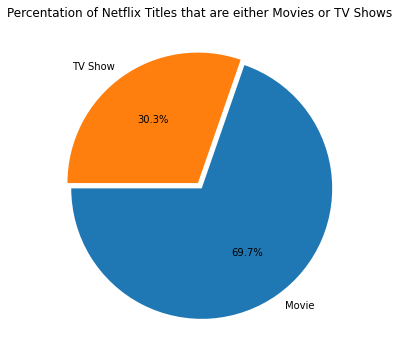

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
sns.color_palette('pastel')
g = plt.pie(netflix_DB.type.value_counts(),explode=(0.025,0.025), labels=netflix_DB.type.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

# **Amount of Content as a Function of Time**

In [ ]:
netflix_movies_df = netflix_DB[netflix_DB.type.str.contains("Movie")]
netflix_shows_df = netflix_DB[netflix_DB.type.str.contains("TV Show")]

In [ ]:
import warnings
netflix_DB.year_added = pd.DatetimeIndex(netflix_DB.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year
warnings.filterwarnings("ignore")

In [ ]:
netflix_year_df = netflix_DB.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

In [ ]:
netflix_year_df

,year,date_added
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


In [ ]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

In [ ]:
movies_year_df

,year,date_added
0,2019.0,1424
1,NaN,1284
2,2018.0,1237
3,2021.0,993
4,2017.0,836
5,2016.0,251
6,2015.0,56
7,2014.0,19
8,2011.0,13
9,2013.0,6


In [ ]:
shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

In [ ]:
shows_year_df

,year,date_added
0,NaN,595
1,2019.0,592
2,2021.0,505
3,2018.0,411
4,2017.0,349
5,2016.0,175
6,2015.0,26
7,2014.0,5
8,2013.0,5
9,2008.0,1


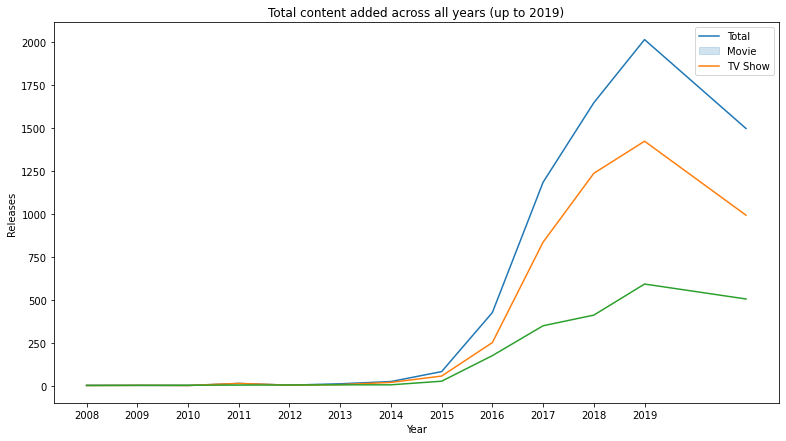

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x="year", y="date_added")
sns.lineplot(data=movies_year_df, x="year", y="date_added")
sns.lineplot(data=shows_year_df, x="year", y="date_added")
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(["Total","Movie","TV Show"])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the timeline above, we can notice that Netflix started gaining traction after 2014. Since then, the amount of content added has been increasing significantly. 
The growth in the number of movies on Netflix is much higher than that on TV shows

# **Countries by the Amount of the Produces Content**

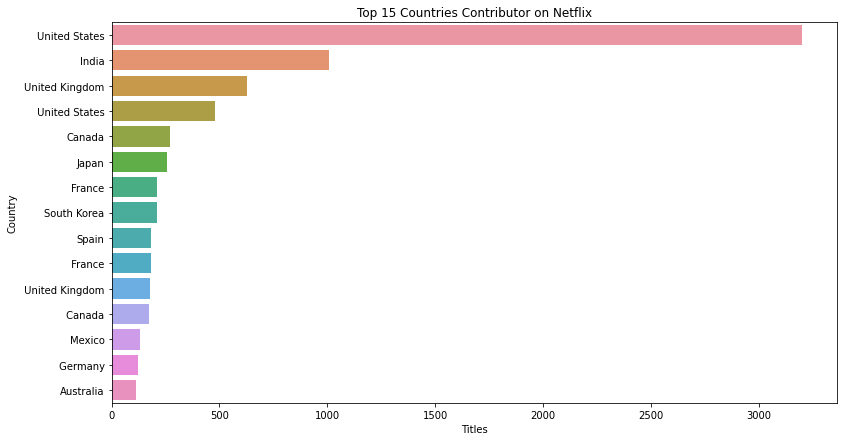

In [ ]:
filtered_countries = netflix_DB.set_index("title").country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title("Top 15 Countries Contributor on Netflix")
plt.xlabel("Titles")
plt.ylabel("Country")
plt.show()

The explore the countries by theamount of the produces content of Netflix, I needed to separate all countries within a film before starting the analyse, then removing titles with no country available.
From the graph above, we can see the top 15 countries contibutor to Netlix; the country having the highest amount of the produces content is the United States.

# **The highest Genre**

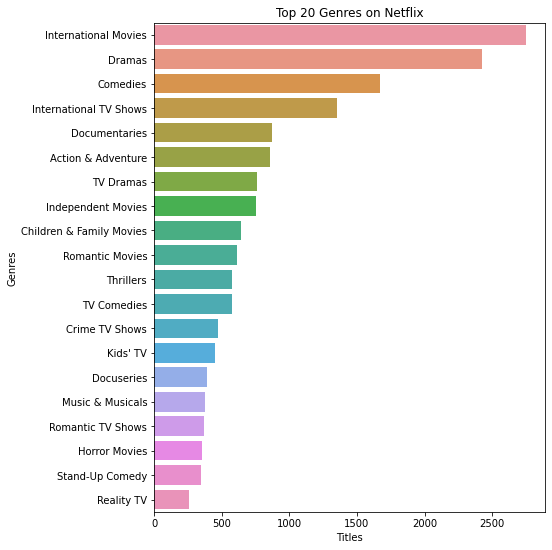

In [ ]:
filtered_genres = netflix_DB.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, we can see that International movies take the first place followed by dramas and comedies.

# **Analysis of duration of movies**

In [ ]:
netflix_movies_df['duration']=netflix_movies_df['duration'].str.replace(' min','')
netflix_movies_df['duration']=netflix_movies_df['duration'].astype(str).astype(int)
netflix_movies_df['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

<Axes: xlabel='duration', ylabel='Density'>

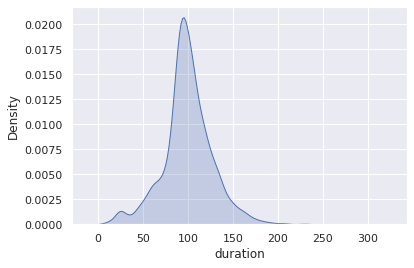

In [ ]:
sns.set()
sns.kdeplot(data=netflix_movies_df['duration'], shade=True)

We notice that the amount of movies on Netflix are among the duration of 75-120 mins. 

# **TV shows with largest number of seasons**

In [ ]:
features=['title','duration']
durations= netflix_shows_df[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

<Axes: xlabel='title'>

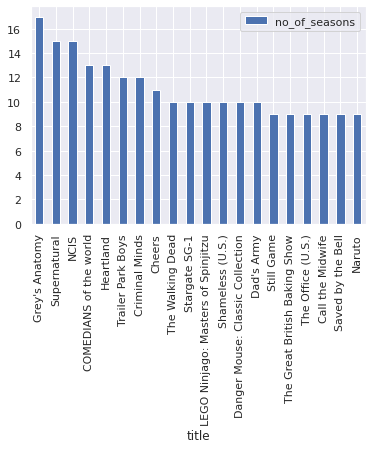

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)

top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons')

The "Grey's Anatomy" ,"NCIS" and "Supernatural" are TOP3 amongst the tv series that have highest number of seasons.

# **Top actors on Netflix TV Show and Movies.**

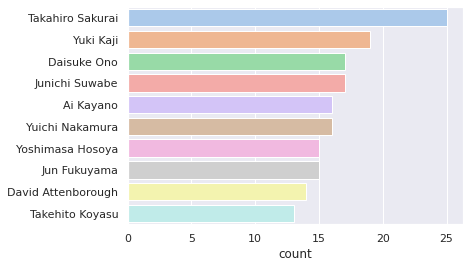

In [ ]:
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show is Takahiro Sakurai

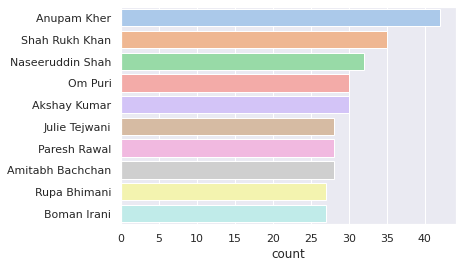

In [ ]:
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix Movies is Anupam Kher